**Student Information**

Môn học: Toán Ứng dụng và Thống kê

Họ tên: Bế Lã Anh Thư

Lớp: 22CLC02

MSSV: 22127402



# **Giải thuật Ordinary least square**
## Bước 1: Phương trình hồi quy tuyến tính

Cho các hàm cơ bản $f_1(x), f_2(x), \cdots, f_k(x)$, phương trình mô tả mô hình hồi quy tuyến tính như sau:
$$f(x) = \theta_1 f_1(x) + \theta_2 f_2(x) + \cdots + \theta_k f_k(x)$$
với $\theta_1, \theta_2, \cdots, \theta_k \in \mathbb{R}$ được định nghĩa bởi vector $(\theta_1, \theta_2, \cdots, \theta_k) \in \mathbb{R}^k$

## Bước 2: Sử dụng thuật toán OLS (Ordinary Least Squares) tìm giá trị tối thiểu toàn cục của tổng bình phương sai số

RSS (Residual Sum of Squares) - tổng bình phương sai số giữa giá trị dự đoán của mô hình và giá trị thực tế trong dữ liệu.

$$ RSS(\theta) = RSS(\theta_1, \theta_2, \cdots, \theta_k) = \displaystyle\sum_{i=1}^N [y_i - (\theta_1 f_1(x_i) + \theta_2 f_2 (x_i) + \cdots
+\theta_kf_k(x_i))]$$

## Bước 3: Tạo ma trận X và ma trận Y tương ứng với phương trình

Tạo hai ma trận X và Y tương ứng với phương trình để giải quyết bài toán tối ưu. Ma trận X là ma trận chứa các giá trị tương ứng của các đặc trưng $f_i(x_i)$ tại từng điểm dữ liệu của $x_i$, ma trận Y chứa các giá trị kết quả $y_i$ tương ứng. Ngoài ra ta tạo thêm một vector $\theta$ chứa các hệ số hồi quy $b_i$ cần tìm.


$$X = \begin{bmatrix} f_1(x_1) & f_2(x_1) & \cdots & f_k(x_1) \\ f_1(x_2) & f_2(x_2) & \cdots & f_k(x_2) \\ \vdots & \vdots & & \vdots \\ f_1(x_N) & f_2(x_N) & \cdots & f_k(x_N) \end{bmatrix} \in \mathbb{R}^{N \times k}, 
Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} \in \mathbb{R}^{N \times 1}$$
Từ đó ta có được ma trận:
$$Y - X\theta = \begin{bmatrix} y_1 - (\theta_1 f_1(x_1) + \theta_2 f_2 (x_1) + \cdots
+\theta_kf_k(x_1)) \\ \vdots \\ y_i - (\theta_1 f_1(x_i) + \theta_2 f_2 (x_i) + \cdots
+\theta_kf_k(x_i)) \\ \vdots \\ y_N - (\theta_1 f_1(x_N) + \theta_2 f_2 (x_N) + \cdots
+\theta_kf_k(x_N)) \end{bmatrix}$$

## Bước 4: Giải pháp tối ưu tương ứng
Sau khi tìm được ma trận $Y - X\theta$ tương ứng, ta có được giá trị bình phương tối thiểu:
$$RSS(\theta) = ||Y - X\theta||^2$$
Khi $k \leq N$ và $rank(X) = k$ (ma trận X có đủ bậc và có rank bằng k), giá trị $\theta$ tối ưu nhất để giảm thiểu $RSS(\theta)$ có thể được tính toán bằng công thức sau:
$$(X^TX)^{-1}X^TY = \underset{b \in \mathbb{R}^k}{\text{arg min}} \, RSS(\theta)$$

# **Khai thác tập data**


In [2]:
# import thư viện
from fractions import Fraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   int64  
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 112.5 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.625271,0.519133,0.293353,2.564470,0.089266,15.242702,46.884070,0.997059,3.298582,0.665738,10.383069,5.664721
std,1.781795,0.179208,0.196751,1.264441,0.048310,10.210406,33.949177,0.001878,0.156161,0.175921,1.091891,0.809593
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.996000,3.195000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.290000,2.200000,0.080000,13.000000,38.000000,0.997020,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998175,3.390000,0.735000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


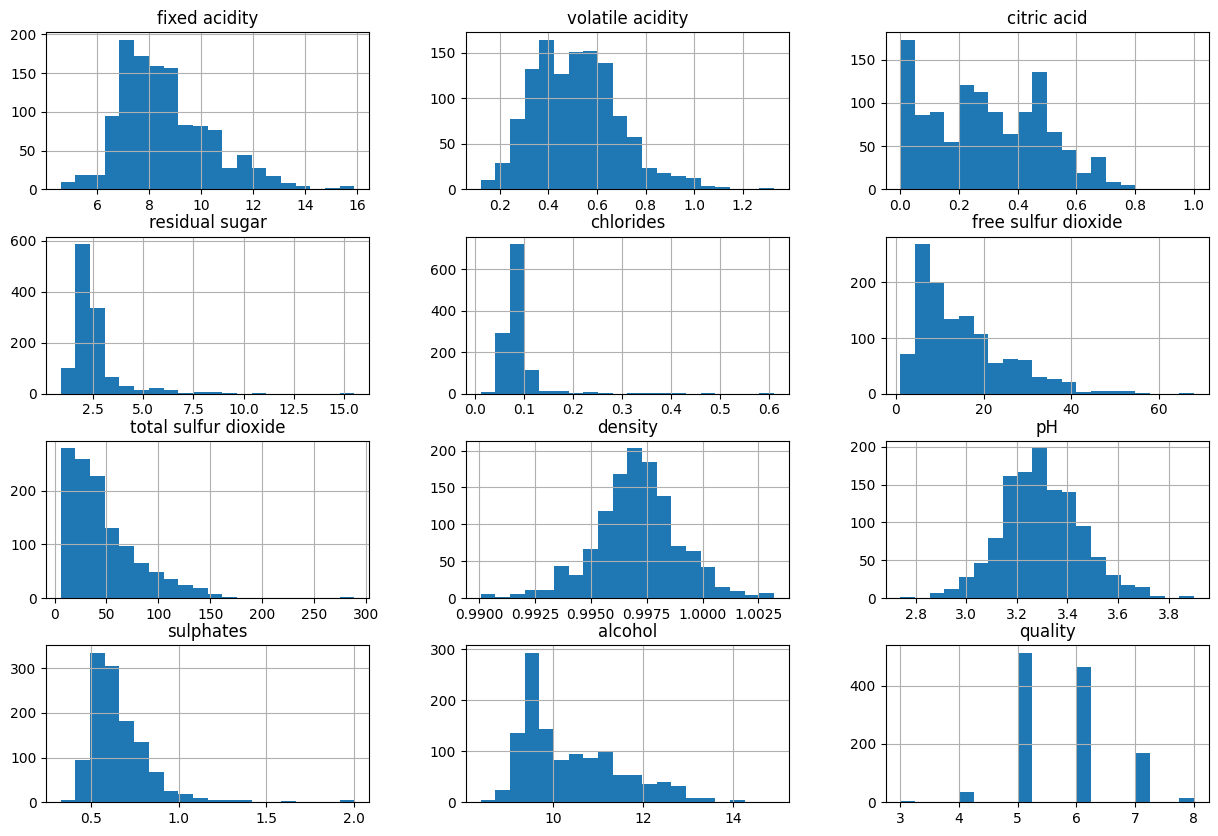

In [5]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

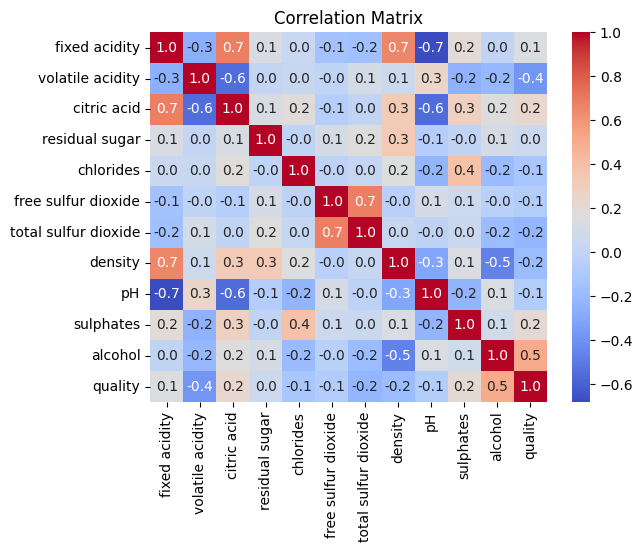

In [6]:
# Phân tích tương quan giữa các đặc trưng và biến mục tiêu 'quality'
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt= '.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Xem hệ số tương quan của từng đặc trưng với 'quality'
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.505369
citric acid             0.228205
sulphates               0.211381
fixed acidity           0.149037
residual sugar          0.049020
free sulfur dioxide    -0.074971
pH                     -0.075664
chlorides              -0.124468
density                -0.192464
total sulfur dioxide   -0.226884
volatile acidity       -0.379885
Name: quality, dtype: float64


# Các hàm bổ sung

In [8]:
def dot_product(v1, v2):
    '''
        tích vô hướng của 2 vector
    '''
    return sum(x*y for x, y in zip(v1, v2))

def swap_col(A, pre_index, new_index):
    ''' 
        swap 2 column of the matrix
    '''
    A[pre_index], A[new_index] = A[new_index], A[pre_index]

def subtract_vectors(a, b):
    ''' 
        subtract vector b from vector a
        size: nx1
        return vector size nx1
    '''
    return [[a[i][0] - b[i][0]] for i in range(len(a))]

def norm_product(vec):
    '''   
        Tính chuẩn của các vector
    '''
    return dot_product([v[0] for v in vec], [v[0] for v in vec]) ** 0.5

def create_identity_matrix(n):
    ''' 
        create the identity matrix size nxn
    '''
    return [[1 if row == col else 0 for col in range(n)] for row in range(n)]

def print_matrix(A):
    '''
        print matrix
    '''
    for row in A:
        for element in row:
            try:
                element = float(element)
            except (ValueError, TypeError):
                pass
            print(Fraction(element).limit_denominator(1000), end=' ')
        print()

def gauss_jordan(A, I):
    """
        Generate the inversion matrix of A.
        Input: A - square matrix, size nxn, I - identity matrix, size nxn.
        Output: Inversion matrix of A, size nxn
    """
    n = len(A)
    m = len(A[0])
    pivot = {
        "row": 0,
        "col": 0
    }

    if (m!=n):
        # if matrix is not square
        return []

    while pivot["row"] < n and pivot["col"] < m:
        
        if A[pivot["row"]][pivot["col"]] == 0:
            change_pivot = False

            for row in range(pivot["row"] + 1, n):
                # if there is cell with value != 0 in same col with pivot, swap that row with pivot row.
                if A[row][pivot["col"]] != 0:
                    swap_col(A, pivot["row"], row)
                    swap_col(I, pivot["row"], row)
                    change_pivot = True
                    break
            
            if not change_pivot:
                # no non-zero element found in same column w pivot, move to the next coiumn
                return []

        # eliminate to get leading 1
        leading = Fraction(1/A[pivot["row"]][pivot["col"]])
        for ele in range(m):
            A[pivot["row"]][ele] *= leading
            I[pivot["row"]][ele] *= leading
        
        # eliminate other col to zero
        for ele_row in range(n):
            if ele_row == pivot["row"]:
                continue
            coefficient = A[ele_row][pivot["col"]]
            for ele_col in range(m):
                if ele_col >= pivot["row"]:
                    A[ele_row][ele_col] -= coefficient*A[pivot["row"]][ele_col]
                I[ele_row][ele_col] -= coefficient*I[pivot["row"]][ele_col]
        
        pivot["row"] += 1
        pivot["col"] += 1
    
    return I

def inversion(A):
    '''
        create the inversion matrix of matrix A
    '''
    I = create_identity_matrix(len(A))
    invertible_matrix = gauss_jordan(A, I)
    
    return invertible_matrix

def tranpose(A):
    '''
        create the tranpose matrix of matrix A
    '''
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def multiply_matrix_matrix(A, B):
    ''' 
        multiply 2 matrix.
        A: matrix size nxm
        B: matrix size mxp
        return: matrix size nxp
    '''
    # Kiểm tra xem số cột của A có bằng số hàng của B không
    if len(A[0]) != len(B):
        raise ValueError("Số cột của A phải bằng số hàng của B để nhân ma trận.")
    
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

def calculate_rss(Y, X, theta):
    '''      
        calculate the RSS.
        Y: vector size nx1
        X: matrix size nxm
        theta: vector size mx1
    '''

    # calculate X.theta
    X_theta = multiply_matrix_matrix(X, theta)

    # calculate Y - X.theta
    residuals = subtract_vectors(Y, X_theta)

    rss = norm_product(residuals)

    return rss

# **a) Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp**

## Mô hình tuyến tính $Y =  \theta_0 + \displaystyle\sum_{i=1}^N\theta_i X_i$

In [12]:
# tạo ma trận X và ma trận Y từ dataframe
X = df.drop("quality", axis=1).values.tolist() # features
Y = df["quality"].values.tolist() # target

# thêm X^0 vào X (giá trị 1)
X = [[1] + row for row in X]
Y = [[y] for y in Y]

# Tìm ma trận X^T.X
X_T = tranpose(X)
XTX = multiply_matrix_matrix(X_T, X)

# nghịch đảo ma trận X^T.X
XTX_inv = inversion(XTX)

# ma trận X^T.Y
XTY = multiply_matrix_matrix(X_T, Y)

# argmin(RSS)
theta = multiply_matrix_matrix(XTX_inv, XTY)

# tính chuẩn bình phương tối thiểu
rss = calculate_rss(Y, X, theta)

# xuất ra kết quả
print(f'Theta: {theta}')
print(f'Sai số bình phương tối thiểu (RSS) = {rss}')

Theta: [[42.91716228888254], [0.047524752892812216], [-1.0687425805320174], [-0.26871082850601624], [0.03497426610914545], [-1.5972956049074156], [0.003487881376996127], [-0.0037983550575281244], [-39.46908086675103], [-0.24557590904441895], [0.7738407941076559], [0.26937749584209314]]
Sai số bình phương tối thiểu (RSS) = 22.09471680779165


# **b) Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.**

## Mô hình tuyến tính $Y =  \theta_0 + \theta_1 X$

Feature: fixed acidity
Theta: [[5.0806344171184605], [0.06771800901930902]]
Sai số bình phương tối thiểu (RSS) = 27.708776606551698



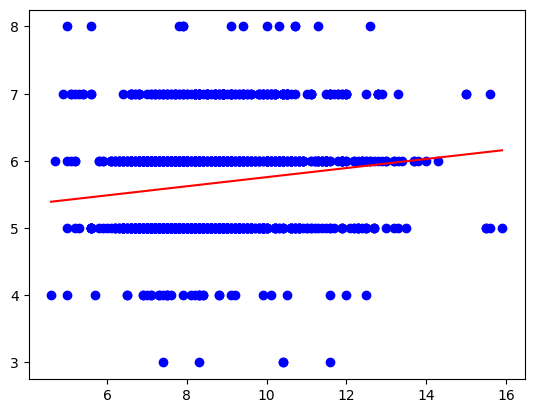

Feature: volatile acidity
Theta: [[6.555645007462523], [-1.7161788508893494]]
Sai số bình phương tối thiểu (RSS) = 25.921046257502894



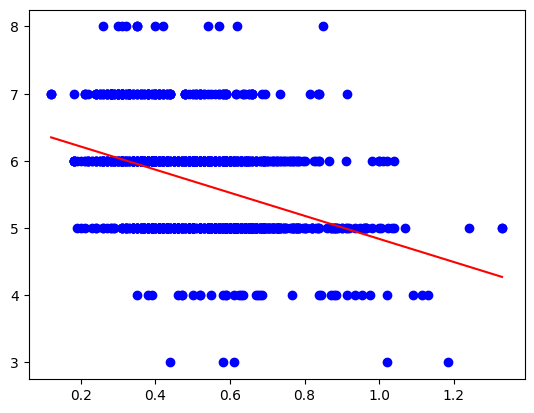

Feature: citric acid
Theta: [[5.3892558720401205], [0.9390220038776818]]
Sai số bình phương tối thiểu (RSS) = 27.28232609600131



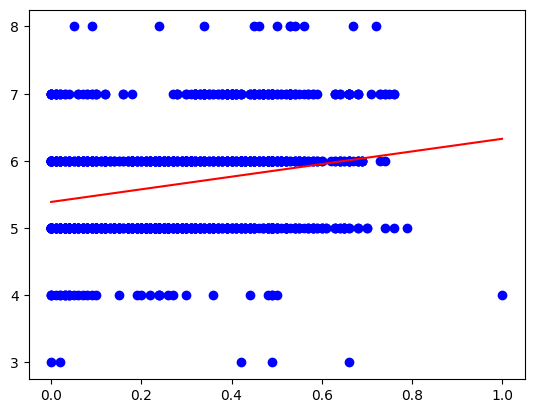

Feature: residual sugar
Theta: [[5.584230669808477], [0.03138657047600901]]
Sai số bình phương tối thiểu (RSS) = 27.988047661119886



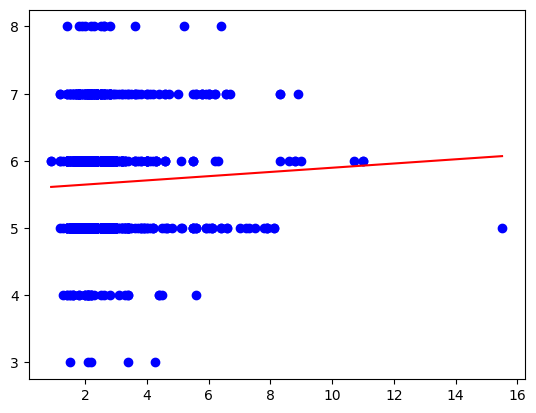

Feature: chlorides
Theta: [[5.850916089310324], [-2.0858487441191755]]
Sai số bình phương tối thiểu (RSS) = 27.80382915794736



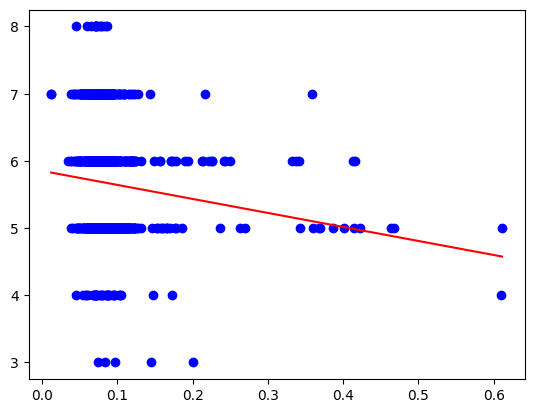

Feature: free sulfur dioxide
Theta: [[5.755330733050995], [-0.005944492718764738]]
Sai số bình phương tối thiểu (RSS) = 27.942875473161074



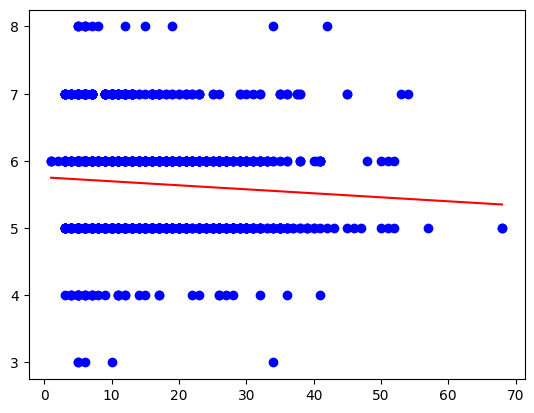

Feature: total sulfur dioxide
Theta: [[5.918388599027951], [-0.005410537058998022]]
Sai số bình phương tối thiểu (RSS) = 27.290982072665077



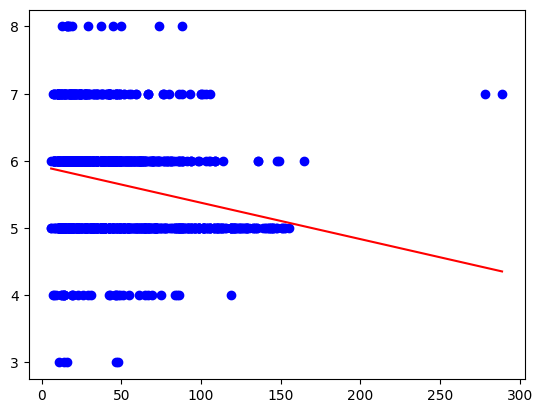

Feature: density
Theta: [[88.38811959931627], [-82.9674402163364]]
Sai số bình phương tối thiểu (RSS) = 27.497840577708818



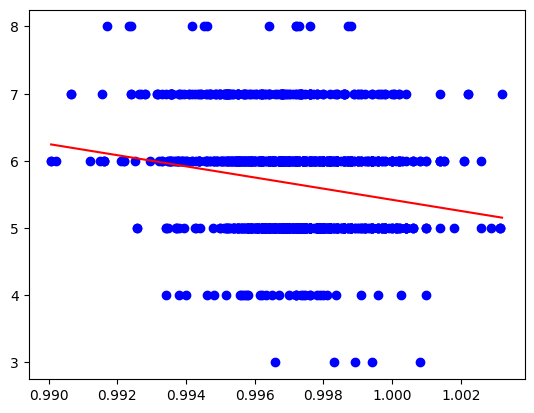

Feature: pH
Theta: [[6.958651796138838], [-0.392268901029297]]
Sai số bình phương tối thiểu (RSS) = 27.941408153675564



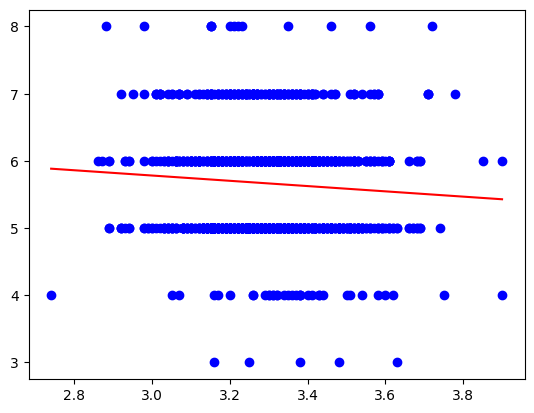

Feature: sulphates
Theta: [[5.017103749572016], [0.9727801912544578]]
Sai số bình phương tối thiểu (RSS) = 27.388550316050484



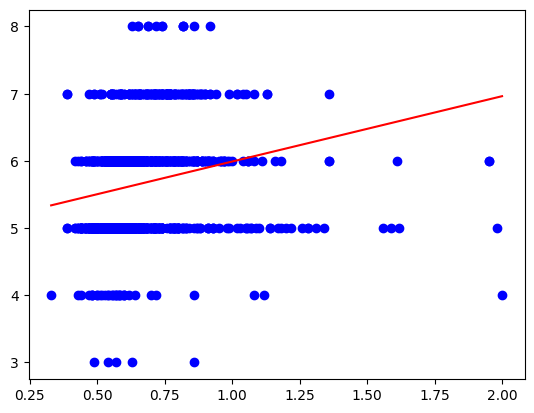

Feature: alcohol
Theta: [[1.7740758844502125], [0.37471046681695697]]
Sai số bình phương tối thiểu (RSS) = 24.18005277501417



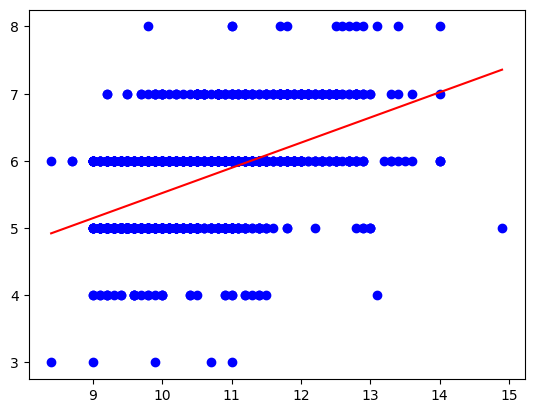

Đặc trưng cho kết quả tốt nhất:
alcohol : 24.18005277501417


In [13]:
def model(x, theta):
    return theta[0][0] + theta[1][0] * x

def draw_plot(X, Y, theta):
    '''   
        trực quan hóa dữ liệu bằng hàm plot
    '''
    ts = np.linspace(min(X), max(X), 50)
    yts = [model(t, theta) for t in ts]
    # tạo plot
    plt.plot(X, Y, "o", color="blue")
    plt.plot(ts, yts, color="red")
    plt.show()

# tạo ma trận X và ma trận Y từ dataframe
X = df.drop("quality", axis=1).values.tolist() # features
Y = df["quality"].values.tolist() # target
features = df.drop("quality", axis=1).columns.tolist()
min_rss = np.inf
min_feature = None

for i in range(len(features)):
    X_i_or = [[row[i]] for row in X]

    # thêm theta_0 vào X (giá trị 1)
    X_i = [[1] + row for row in X_i_or]
    Y_i = [[y] for y in Y]

    # Tìm ma trận X^T.X
    X_T = tranpose(X_i)
    XTX = multiply_matrix_matrix(X_T, X_i)

    # nghịch đảo ma trận X^T.X
    XTX_inv = inversion(XTX)

    # ma trận X^T.Y
    XTY = multiply_matrix_matrix(X_T, Y_i)

    # argmin(RSS)
    theta = multiply_matrix_matrix(XTX_inv, XTY)

    # tính chuẩn bình phương tối thiểu
    rss = calculate_rss(Y_i, X_i, theta)
    if rss <= min_rss:
        min_rss = rss
        min_feature = features[i]

    print(f'Feature: {features[i]}')
    print(f'Theta: {theta}')
    print(f'Sai số bình phương tối thiểu (RSS) = {rss}\n')
    draw_plot(X_i_or, Y_i, theta)

print("Đặc trưng cho kết quả tốt nhất:")
print(min_feature, ":", min_rss)

# c) **Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.**
## Mô hình $y = \theta_0 + \theta_1X + \theta_2X^2$.

In [11]:
X = df.drop("quality", axis=1).values.tolist() # features
Y = df["quality"].values.tolist() # target

# thêm x^0 và x^2 vào X
Y = [[y] for y in Y]

X_expanded = []
for row in X:
    expanded_row = [1]  # Thêm bias term
    for value in row:
        expanded_row.append(value)       # Thêm giá trị x_i
    for value in row:
        expanded_row.append(value**2)    # Thêm giá trị x_i^2
    X_expanded.append(expanded_row)

# Tìm ma trận X^T.X
X_T = tranpose(X_expanded)
XTX = multiply_matrix_matrix(X_T, X_expanded)

# nghịch đảo ma trận X^T.X
XTX_inv = inversion(XTX)

# ma trận X^T.Y
XTY = multiply_matrix_matrix(X_T, Y)

# argmin(RSS)
theta = multiply_matrix_matrix(XTX_inv, XTY)

# Calculate RSS
rss = calculate_rss(Y, X_expanded, theta)

# xuất ra kết quả
print(f'Theta: {theta}')
print(f'Sai số bình phương tối thiểu (RSS) = {rss}')

Theta: [[6179.516323883086], [0.2928740039570812], [-1.015276836990779], [-1.1596219154627363], [0.0568198157114399], [-1.0363042502765438], [0.012683767950415259], [-0.006065669939451013], [-12354.03533308953], [3.3041645907105703], [3.2388467349190364], [0.5331773065227026], [-0.013759625375262985], [-0.001345651866586195], [1.3922438638951462], [-0.0026205054820547247], [-1.2083268896881236], [-0.00020313184938723639], [1.64213995742582e-05], [6168.943296484649], [-0.5532359994122089], [-1.3424808777682244], [-0.01360802012379736]]
Sai số bình phương tối thiểu (RSS) = 21.59595662265595


# Ý tưởng thực hiện và mô tả các hàm

Triển khai thuật toán dựa trên hồi quy tuyến tính, sử dụng phương pháp OLS. Với mục tiêu cuối cùng là tìm các hệ số $\theta$ tối ưu trong mô hình bằng cách tối thiểu hóa sai số bình phương (RSS) giữa giá trị dự đoán và giá trị thực tế.
## Chuẩn bị dữ liệu
- Tạo ma trận $X$ và ma trận $Y$ từ các đặc trưng. Tùy vào mô hình sử dụng, thay đổi giá trị của ma trận X và Y tương ứng.
## Tính toán ma trận
- Tính ma trận $X^T$: Sử dụng hàm `transpose(X)`, tìm ma trận chuyển vị.
- Tính ma trận $X^TX$: Sử dụng hàm `multiply_matrix_matrix(XTX, X)`, nhân hai ma trận $X^T$ và $X$
- Tìm ma trận nghịch đảo của $X^TX$ dựa trên thuật toán gauss-jordan với các hàm đã sử dụng tại Đồ án Gauss-Jordan.
- Tính ma trận $X^TY$: Sử dụng hàm `multiply_matrix_matrix(XT, Y)`, nhân hai ma trận $X^T$ và $Y$
## Tính toán tham số $\theta$: 
- Ma trận theta chứa các tham số theta được tính toán dựa trên công thức $(X^TX)^{-1}XY$, sử dụng hàm `multiply_matrix_matrix(XTX, XY)`
- Từ các ma trận đã tính toán, ta sử dụng hàm `calculate_rss(Y, X, theta)`, hàm sẽ tính toán $X.\theta$ và từ đó tính chuẩn $||Y - X.\theta||^2$